In [1]:

import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")


from prettytable import PrettyTable

from lazypredict.Supervised import LazyRegressor,LazyClassifier

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sb.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

In [3]:
df_train = pd.read_csv('C:/Users/aansh/Downloads/traindata.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
df_test = pd.read_csv('C:/Users/aansh/Downloads/testdata.csv')
dfs = [('train', df_train),('test', df_test)]
df_train['set'] = 'Train'
df_test['set'] = 'Test'
df = pd.concat([df_train,df_test],axis = 0).reset_index(drop = True)

In [5]:
for e in dfs:
    print('Shape_{} :{}\n'.format(e[0],e[1].shape))

Shape_train :(891, 13)

Shape_test :(418, 12)



In [6]:
table = PrettyTable()
print('\t'+' Data{Length: '+str(df.shape)+'} \n')
data_types ={}
for i in df.columns.to_list():
    data_types[i]=str(type(df[i].loc[0]))
table.add_column("Column Name",df.columns.to_list())
table.add_column("NaN_cnt",df.isna().sum())
table.add_column("NaN_percent",df.isna().sum()/len(df))
table.add_column("Content_type",list(data_types.values()))
table.add_column("N_Unique_values",df.nunique())
print(table)

	 Data{Length: (1309, 13)} 

+-------------+---------+-----------------------+-------------------------+-----------------+
| Column Name | NaN_cnt |      NaN_percent      |       Content_type      | N_Unique_values |
+-------------+---------+-----------------------+-------------------------+-----------------+
| PassengerId |    0    |          0.0          |  <class 'numpy.int64'>  |       1309      |
|   Survived  |   418   |  0.31932773109243695  | <class 'numpy.float64'> |        2        |
|    Pclass   |    0    |          0.0          |  <class 'numpy.int64'>  |        3        |
|     Name    |    0    |          0.0          |      <class 'str'>      |       1307      |
|     Sex     |    0    |          0.0          |      <class 'str'>      |        2        |
|     Age     |   263   |  0.20091673032849502  | <class 'numpy.float64'> |        98       |
|    SibSp    |    0    |          0.0          |  <class 'numpy.int64'>  |        7        |
|    Parch    |    0    |      

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,891.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.49,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.27
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


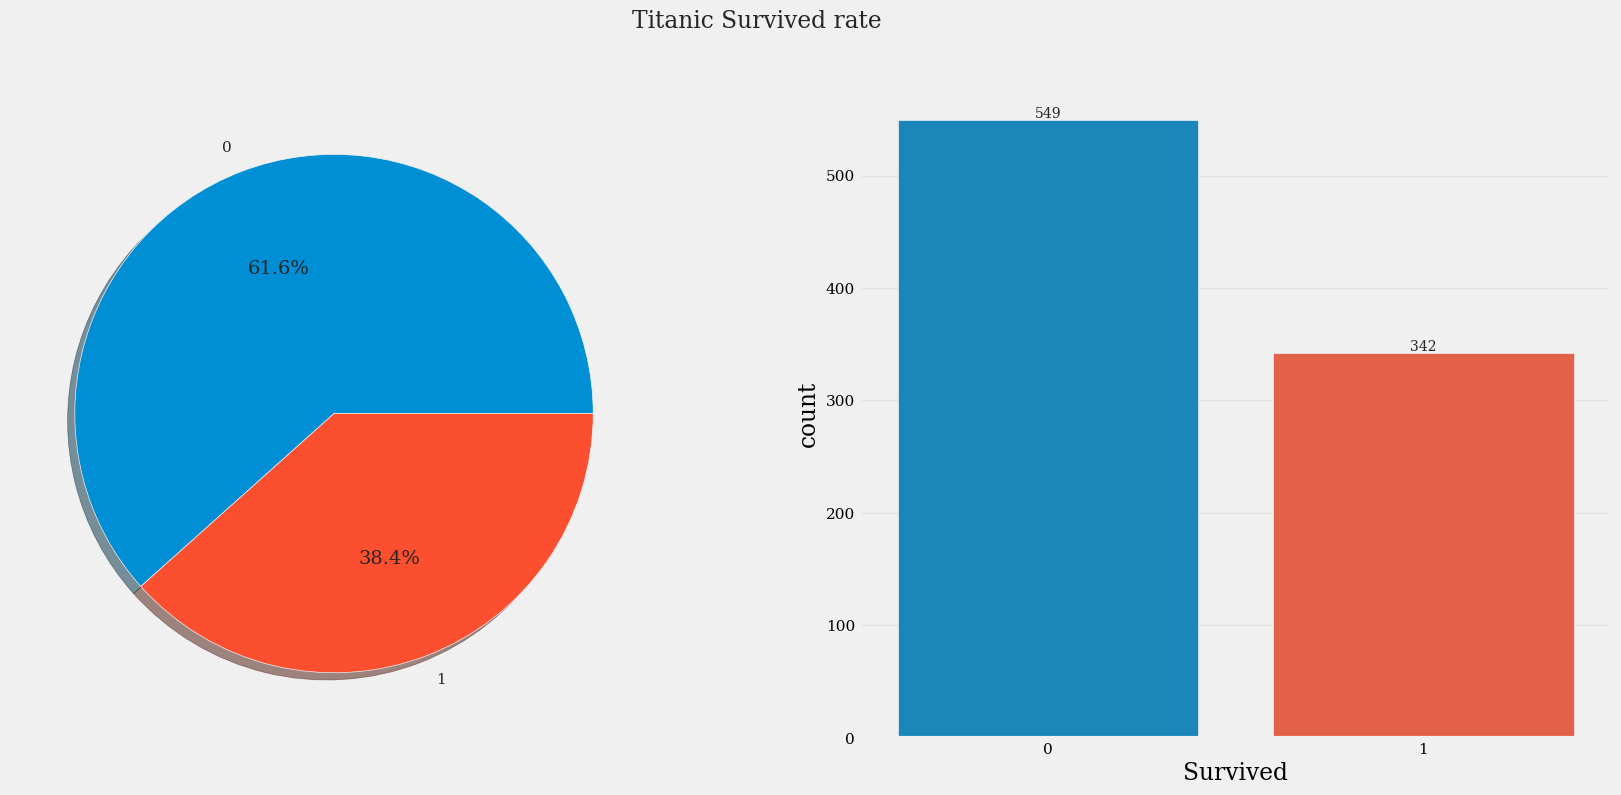

In [8]:

f,ax=plt.subplots(1,2,figsize=(19,8))
df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
ctplt = sb.countplot(x='Survived',data=df_train,ax=ax[1])
ctplt.bar_label(ctplt.containers[0], fontsize=10)
plt.suptitle('Titanic Survived rate')
plt.show()

In [9]:
def UVA_numeric_discrete_on_target(data, var_group):    
    size = len(var_group)
    fig, ax = plt.subplots(size,2, figsize = [20,5*size])
    
    #looping for each variable
    for j,i in enumerate(var_group):
        
        #computing descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()- data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calculating points of standard deviation
        points = mean - st_dev, mean + st_dev
        
        #Plotting the variable with every information
        #sb.histplot(ax = ax[j,0],data=data,x = data[i], hue='set', bins=50, kde=True)
        sb.kdeplot(ax = ax[j,0], data = data,x = data[i],shade = True,hue='Survived')
        sb.lineplot(ax = ax[j,0],x = points,y=[0,0], color = 'black',label = 'std_dev')
        sb.scatterplot(ax=ax[j,0],x = [mini, maxi],y = [0,0],color='orange',label = 'min/max')
        sb.scatterplot(ax=ax[j,0],x = [mean],y = [0], color = 'red',label = "mean")
        sb.scatterplot(ax=ax[j,0],x = [median],y = [0], color = 'blue',label = "median")
        ax[j,0].set_xlabel('{}'.format(i),fontsize = 20)
        ax[j,0].set_ylabel('density')
        ax[j,0].set_title('std_dev = {}; kurtosis = {}; \nskew ={}; range = {} \nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                                round(kurt,2),
                                                                                                                round(skew,2),
                                                                                                                (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                                round(mean,2),
                                                                                                                round(median,2)))
                  
    
        #base_cl = sb.color_palette()[0]
        pickp_data = data[i].value_counts(ascending=False)
        cplt = sb.countplot(data,x = i,hue='Survived',order = pickp_data.index,ax= ax[j,1])
        cplt.bar_label(cplt.containers[0], fontsize=10);
        cplt.bar_label(cplt.containers[1], fontsize=10);
        ax[j,1].set_xlabel('{}'.format(i),fontsize = 20)
        ax[j,1].set_ylabel('Count')
        #plt.legend(loc = 'upper left') # re-arrange legend to reduce overlapping"""
        plt.tight_layout(pad =2)

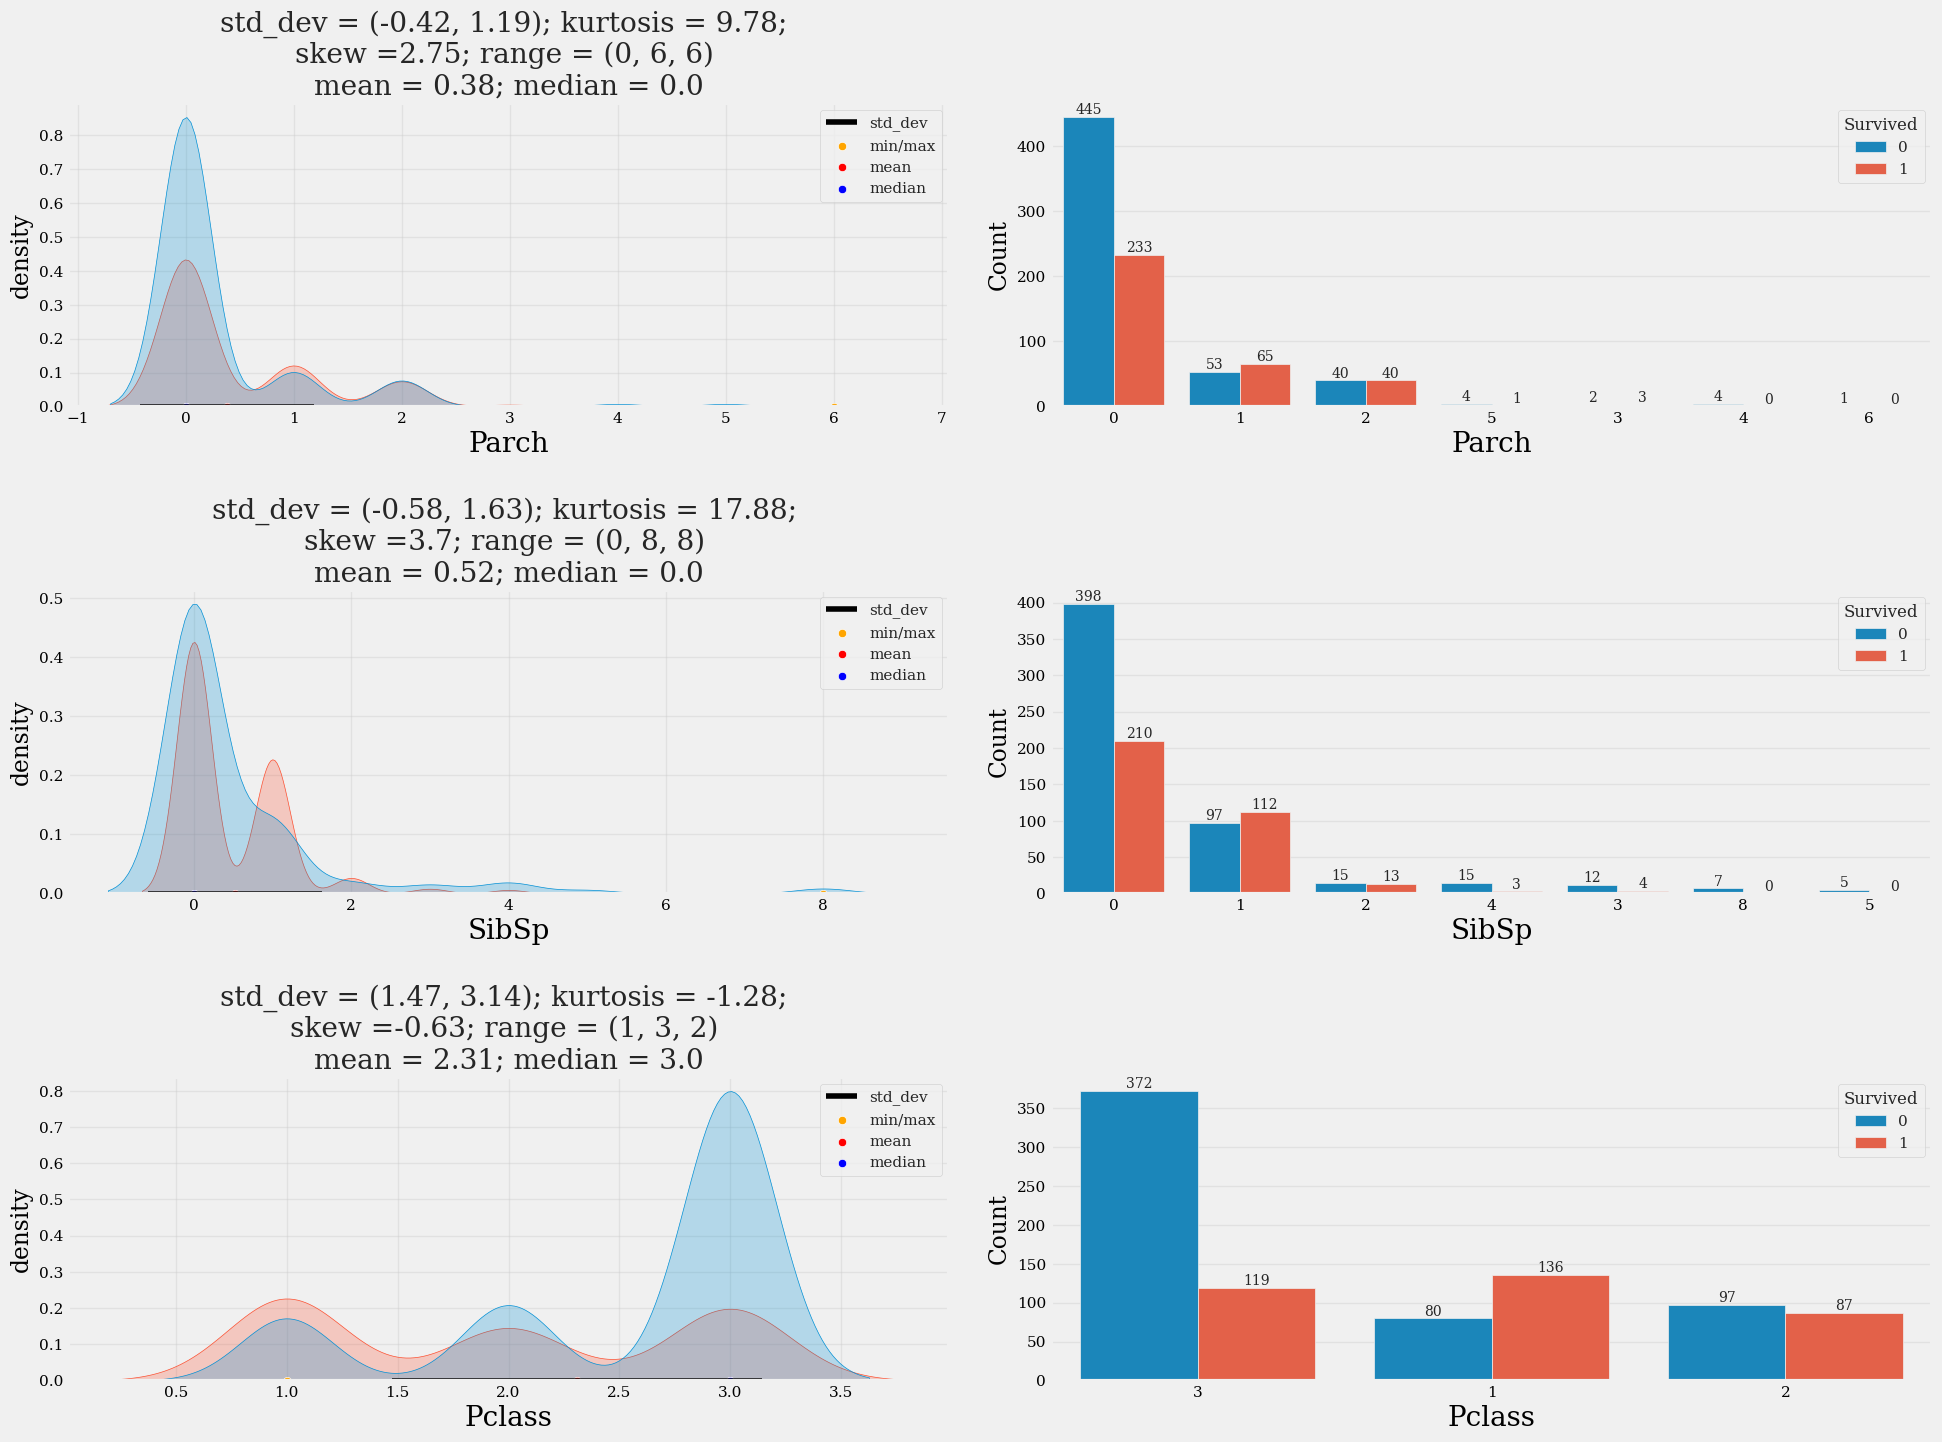

In [14]:
UVA_numeric_discrete_on_target(df_train, ['Parch','SibSp','Pclass'])

In [10]:
def UVA_numeric_continuous_on_target(data, var_group):
    size = len(var_group)
    fig, ax = plt.subplots(size,2, figsize = [25,5*size])
    
    #looping for each variable
    for j,i in enumerate(var_group):

        sb.histplot(ax = ax[j,0],data=data,x = data[i], hue='Survived',hue_order=[1,0],palette =['b','r'], bins=50, kde=True)
        ax[j,0].set_xlabel('{}'.format(i),fontsize = 20)
        ax[j,0].set_ylabel('density')
                  
    
        sb.boxplot(data,y = i,hue = 'Survived',orient='v',hue_order=[1,0],palette =['b','r'],ax= ax[j,1])
        ax[j,1].set_xlabel('{}'.format(i),fontsize = 20)
        plt.legend(ncol = 2) # re-arrange legend to reduce overlapping"""
        plt.tight_layout(pad =2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


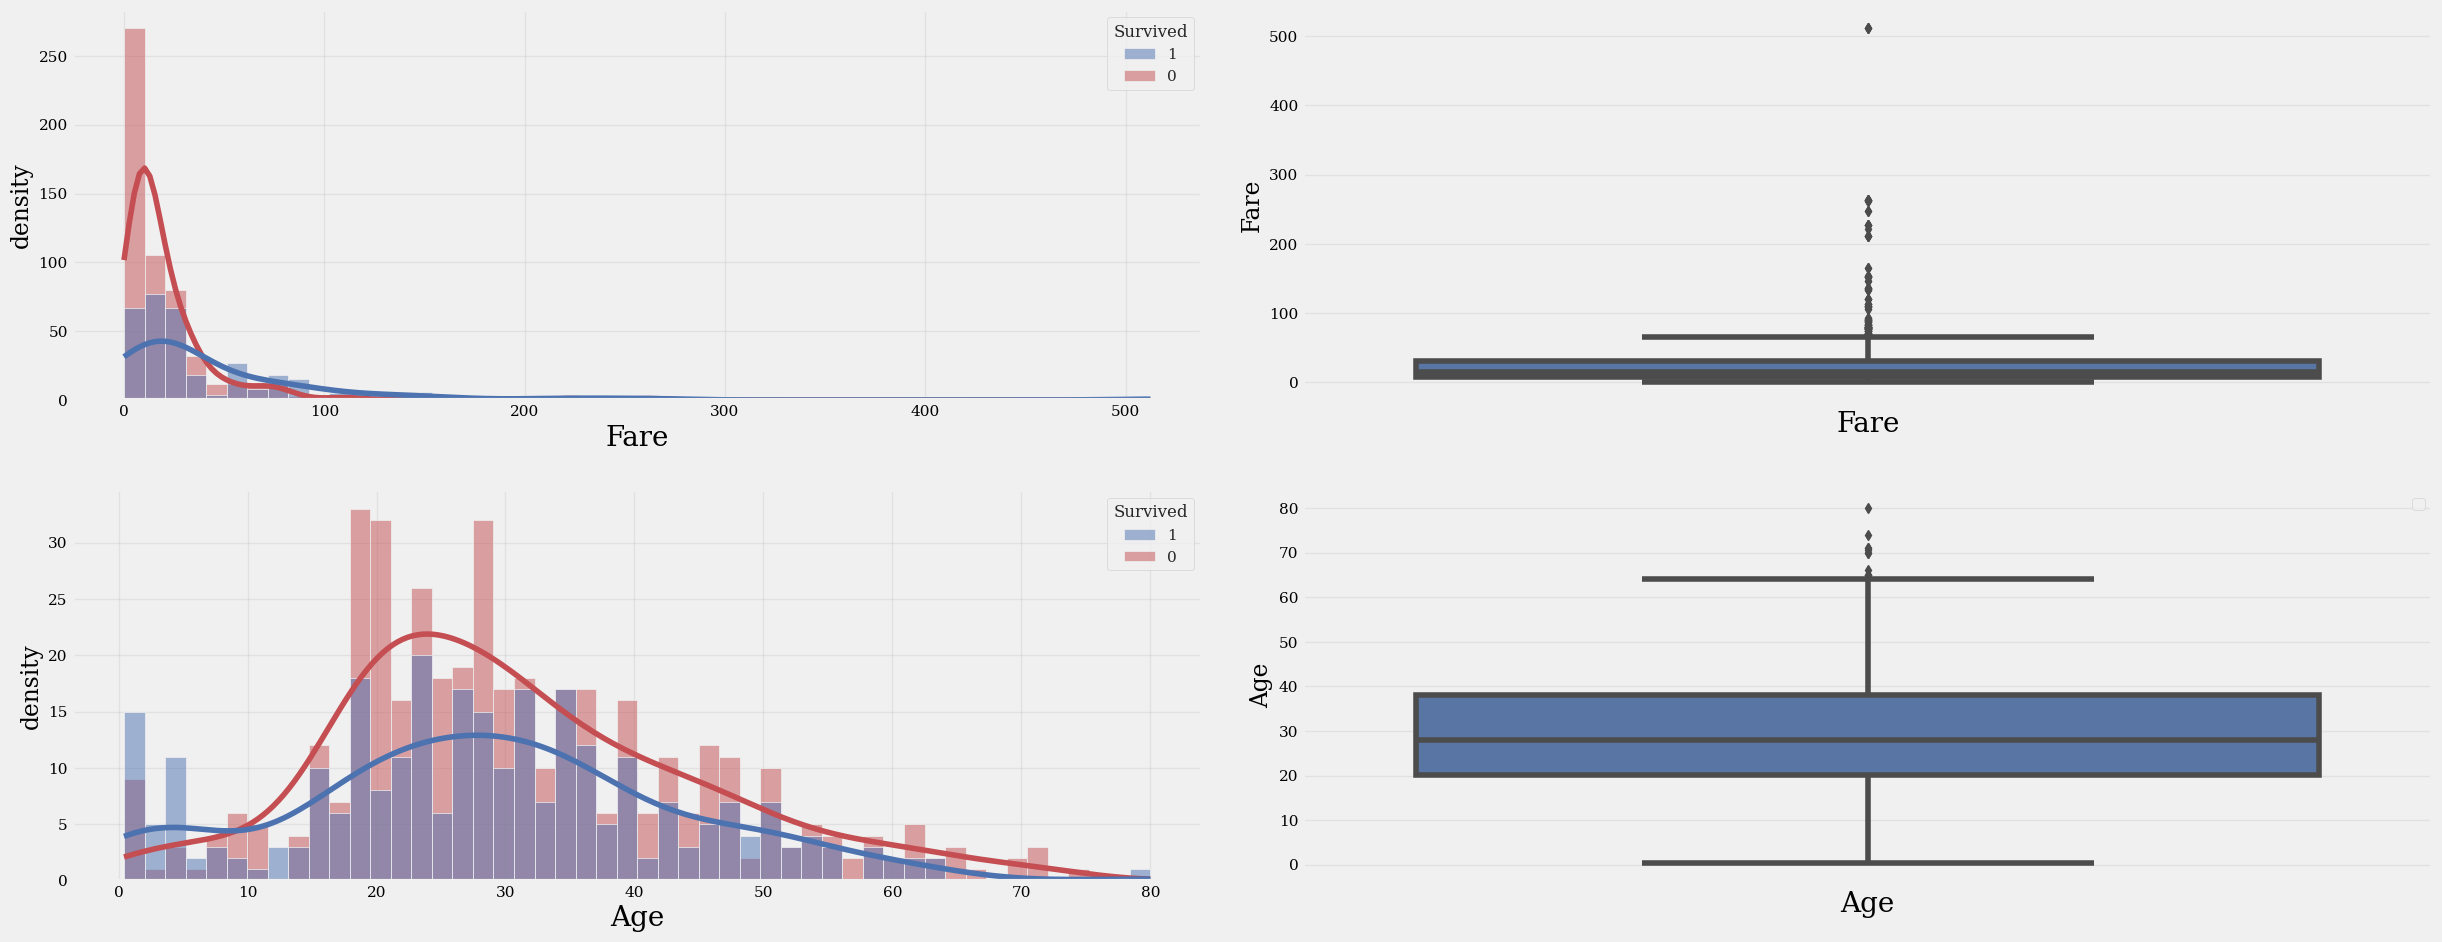

In [16]:
UVA_numeric_continuous_on_target(df_train,['Fare','Age'])

In [11]:
num_cols = ['Pclass','SibSp','Parch','Fare','Age']
num_dis_cols = ['Pclass','SibSp','Parch']
num_cnt_cols = ['Fare','Age']
nominal_cols = ['Ticket','Cabin', 'Embarked']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


	 Survival Rate



Fare
(0.0, 51.233]        0.32
(51.233, 102.466]    0.66
(102.466, 153.699]   0.74
(153.699, 204.932]   1.00
(204.932, 256.165]   0.64
(256.165, 307.398]   0.67
(307.398, 358.63]     NaN
(358.63, 409.863]     NaN
(409.863, 461.096]    NaN
(461.096, 512.329]   1.00
Name: Survived, dtype: float64

Age
(0.42, 8.378]      0.66
(8.378, 16.336]    0.41
(16.336, 24.294]   0.36
(24.294, 32.252]   0.38
(32.252, 40.21]    0.44
(40.21, 48.168]    0.34
(48.168, 56.126]   0.47
(56.126, 64.084]   0.38
(64.084, 72.042]   0.00
(72.042, 80.0]     0.50
Name: Survived, dtype: float64

Pclass
1   0.63
2   0.47
3   0.24
Name: Survived, dtype: float64

SibSp
0   0.35
1   0.54
2   0.46
3   0.25
4   0.17
5   0.00
8   0.00
Name: Survived, dtype: float64

Parch
0   0.34
1   0.55
2   0.50
3   0.60
4   0.00
5   0.20
6   0.00
Name: Survived, dtype: float64

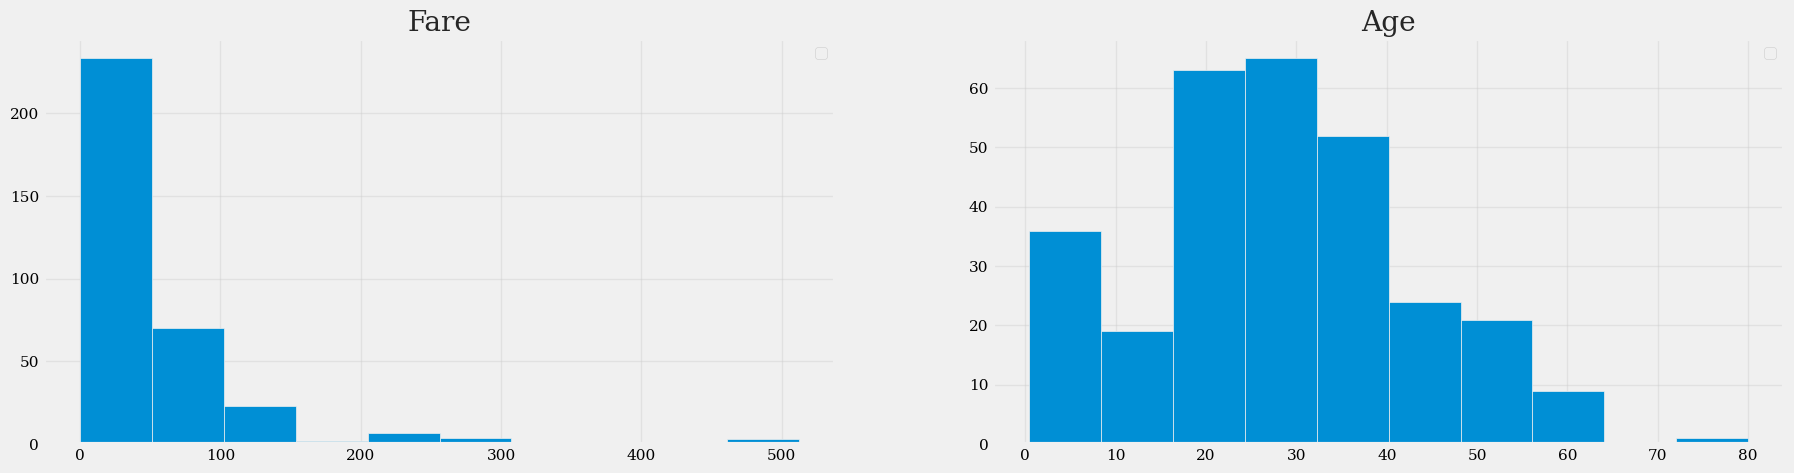

In [18]:
i=1
f= plt.figure(figsize =(20,5))
survival_rates =[]

for col in num_cnt_cols:
    plt.subplot(1,2,i)
    n,bins,patchs = plt.hist(df_train[col].loc[df_train['Survived'] ==1])
    plt.title(col)
    plt.legend()
    i+=1
    
    #Survival rate
    survival_rates.append(pd.concat([pd.cut(df_train[col],bins),df_train['Survived']],axis = 1).groupby([col]).Survived.mean())

print('\t Survival Rate\n')
for se in survival_rates:
    display(se)
for col in num_dis_cols:
    display(df_train.groupby([col]).Survived.mean())

In [12]:
def UVA_category_on_target(data, var_group, max_categories=10):

    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (6*size,30))

    # for every variable
    for j,i in enumerate(var_group):
        """norm_count = data.loc[(data['Survived'] == 1),i].value_counts(normalize = True)[:max_categories]"""
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(2,2,j+1)
        pickp_data = data[i].value_counts(normalize = True,ascending=False)[:max_categories]
        cplt = sb.countplot(data,x = i,hue='Survived',order = pickp_data.index)
        cplt.bar_label(cplt.containers[0], fontsize=10);
        cplt.bar_label(cplt.containers[1], fontsize=10);
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel(f'{i}', fontsize = 20)
        plt.title(f'n_uniques = {n_uni} on {data.shape[0]} \n value counts \n {pickp_data[:3]}')
        plt.tight_layout(pad=3)

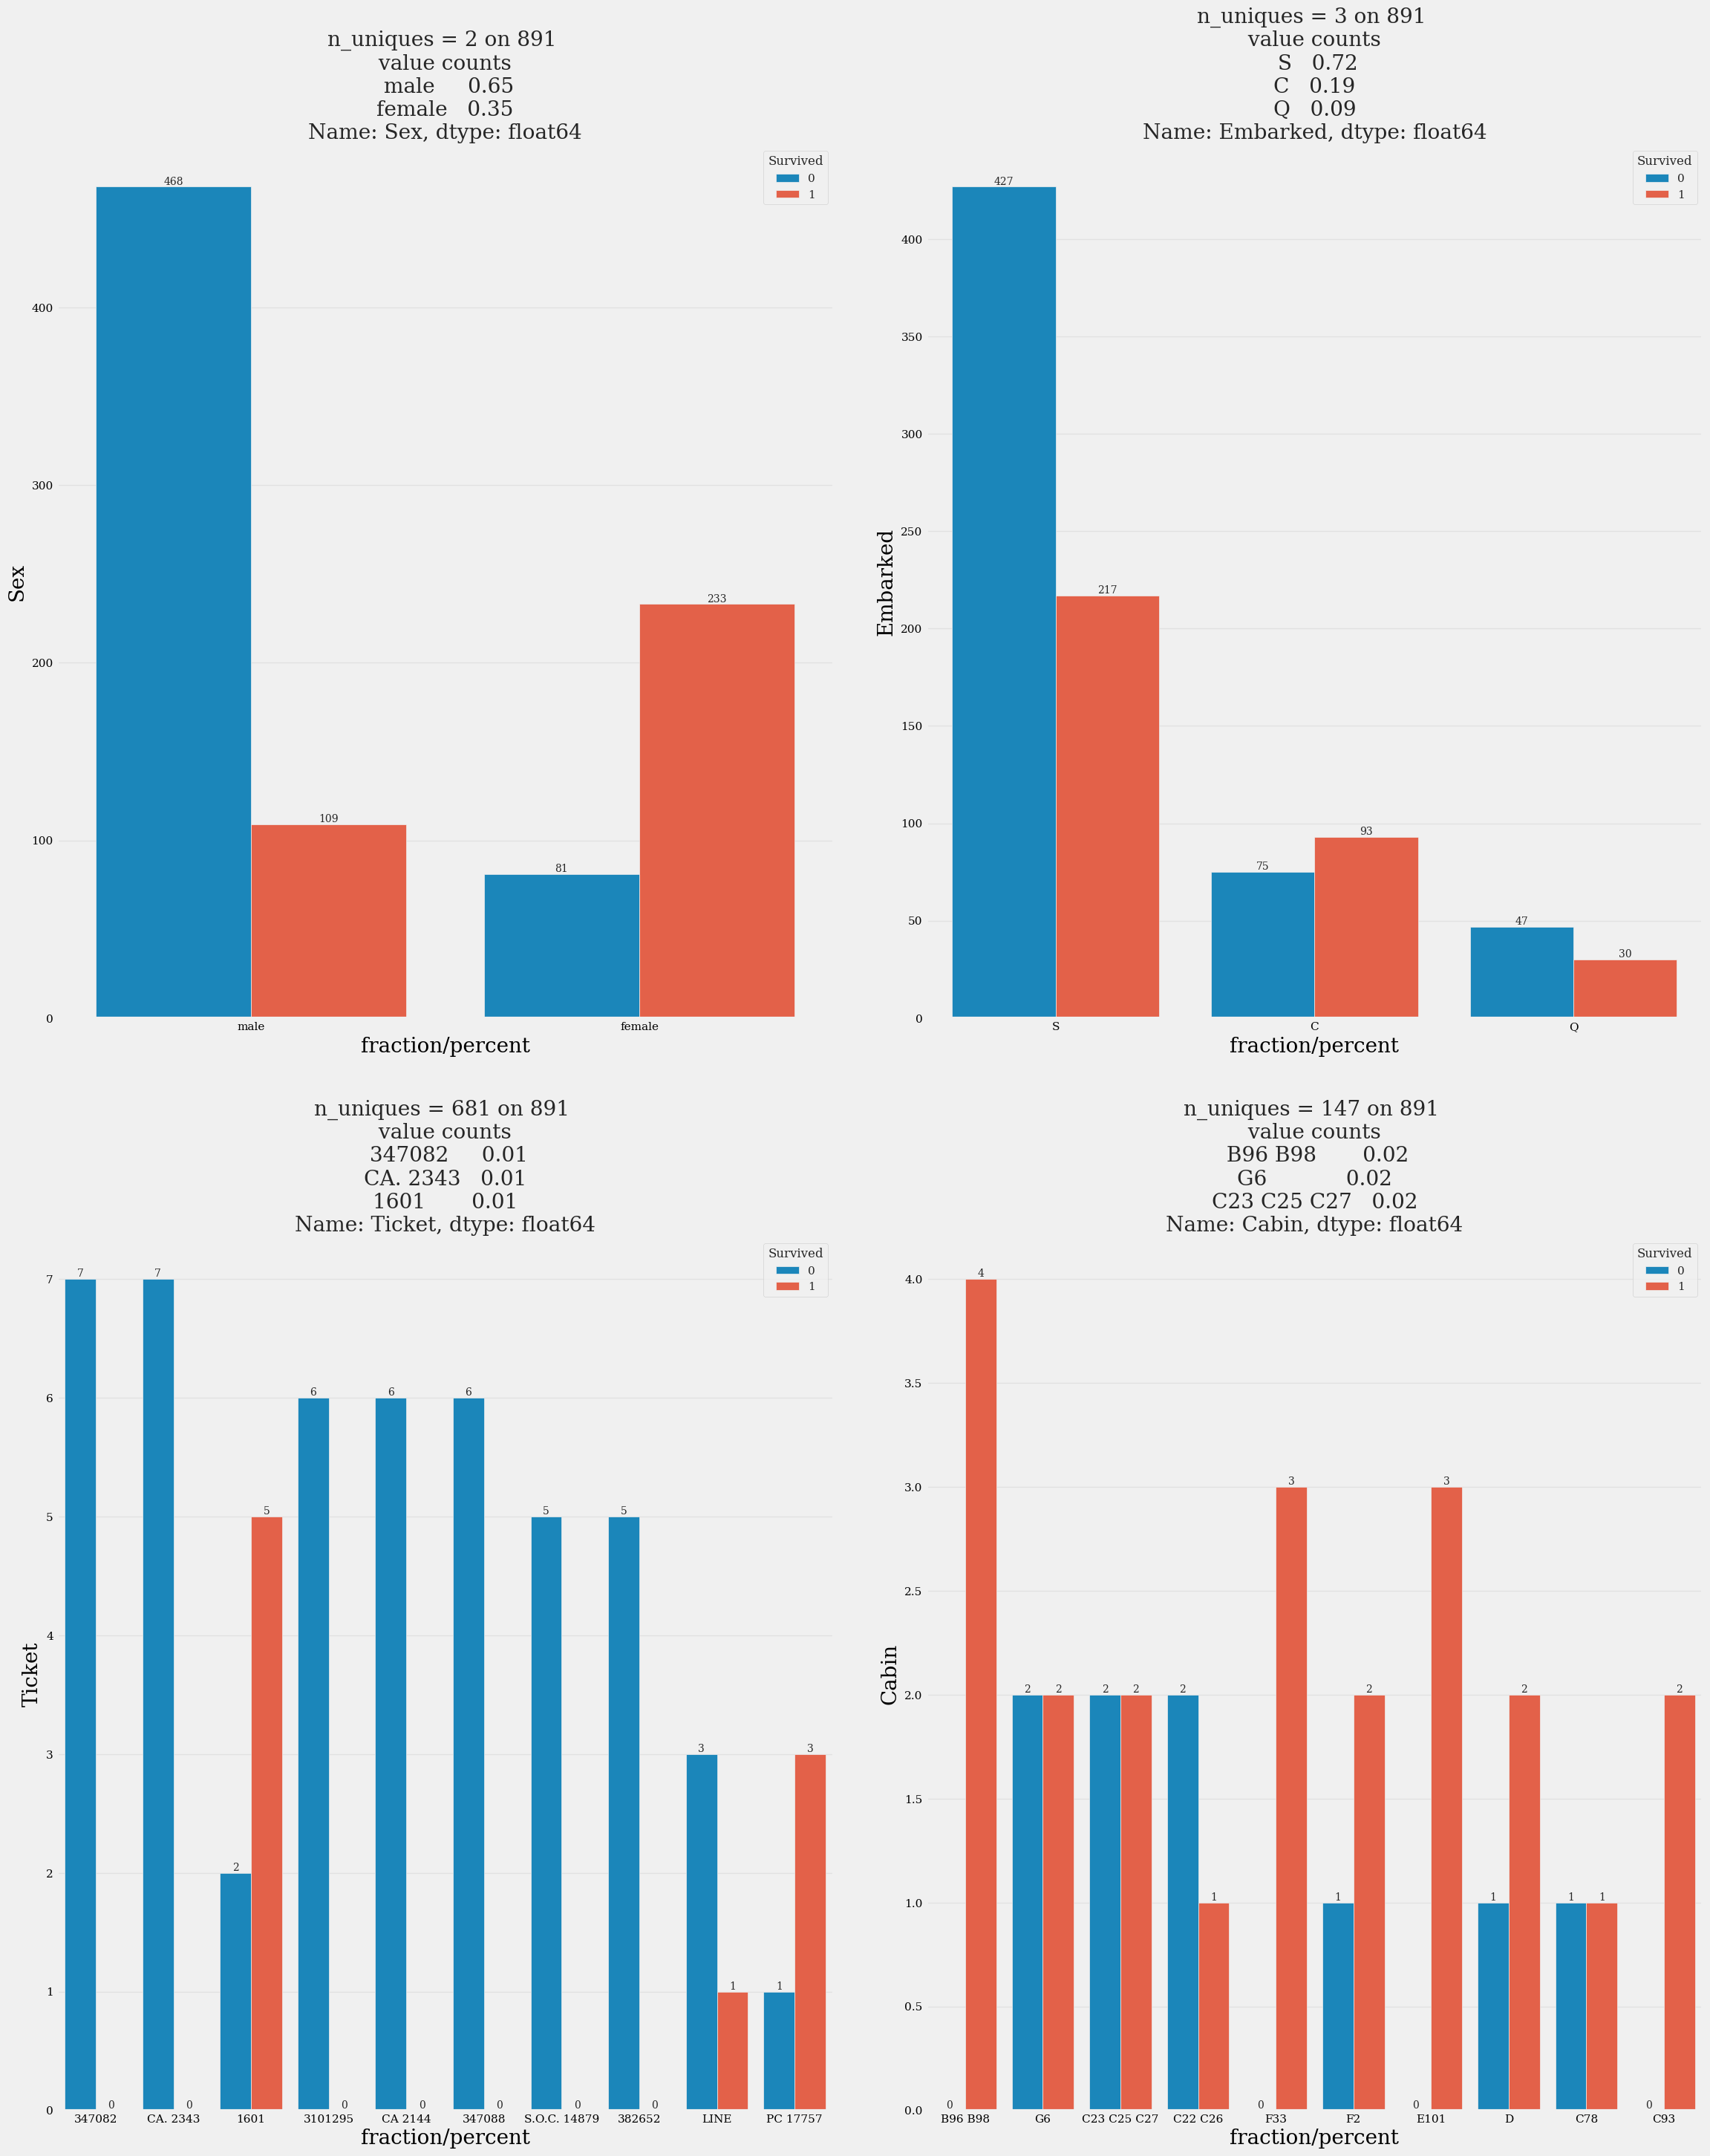

In [21]:
UVA_category_on_target(df_train,['Sex','Embarked','Ticket','Cabin'])

In [13]:
print(df_train.groupby(['Embarked']).Survived.mean(),'\n')
pd.crosstab(df_train['Embarked'],df_train['Pclass'])

Embarked
C   0.55
Q   0.39
S   0.34
Name: Survived, dtype: float64 



Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [17]:
data_train = df_train.copy()
data_test = df_test.copy()
data_full = df.copy()

In [18]:
num_cols = ['Pclass','SibSp','Parch','Fare_final','Age_final','Survived']
num_dis_cols = ['Pclass','SibSp','Parch']
num_cnt_cols = ['Fare_final','Age_final']
nominal_cols = ['Age_category','formal_title', 'Embarked','Sex']